# Load and Explore the Dataset 

In [1]:
import pandas as pd

train_df = pd.read_csv("C:/Users/SEI-LP95/OneDrive/Documents/BSC22DS96/Twitter Sentiment Analysis/twitter_training.csv")
validation_df = pd.read_csv("C:/Users/SEI-LP95/OneDrive/Documents/BSC22DS96/Twitter Sentiment Analysis/twitter_validation.csv")

In [2]:
# Display the first few rows of each dataset
print(train_df.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [3]:
# Display the first few rows of each dataset
print(validation_df.head())

   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
2  CSGO matchmaking is so full of closet hacking,...        

In [4]:
# Check for any missing values and get a summary of the dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [5]:
print(train_df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


# Clean the Data

In [6]:
# Check for any missing values
print(train_df.isnull().sum())

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64


In [7]:
# Drop rows with missing values
train_df.dropna(inplace=True)

In [8]:
# Rename columns for clarity
train_df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Sentiment Analysis

In [9]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    

In [10]:
#Perform Sentiment Analysis on Text Data
from textblob import TextBlob

In [11]:
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [12]:
train_df['SentimentScore'] = train_df['Text'].apply(analyze_sentiment)

# Visualize the Data

In [13]:
import matplotlib.pyplot as plt

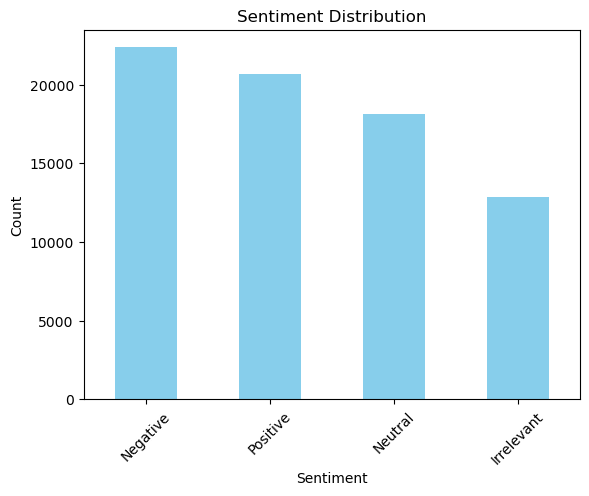

In [14]:
# Plot sentiment distribution
sentiment_counts = train_df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

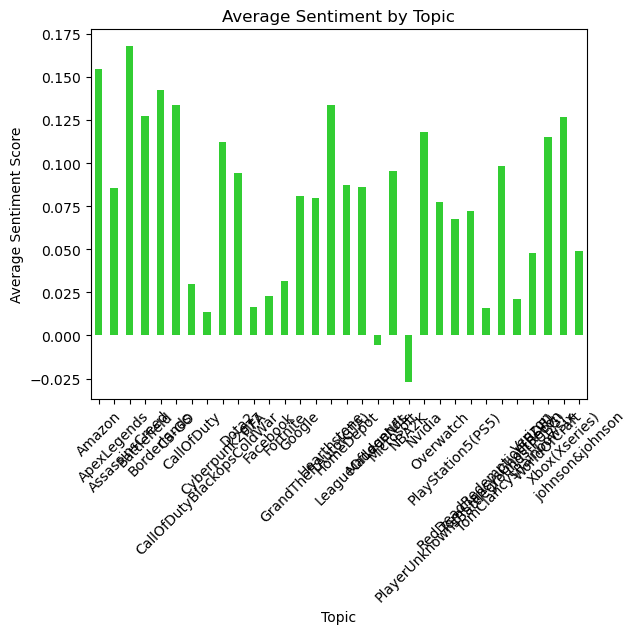

In [17]:
# Plot average sentiment by topic
topic_sentiment = train_df.groupby('Topic')['SentimentScore'].mean()
topic_sentiment.plot(kind='bar', color='limegreen')
plt.title('Average Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()